<a href="https://colab.research.google.com/github/NeginMirian/Rag-implementation/blob/main/Karafs_sale_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from scalecast.auxmodels import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

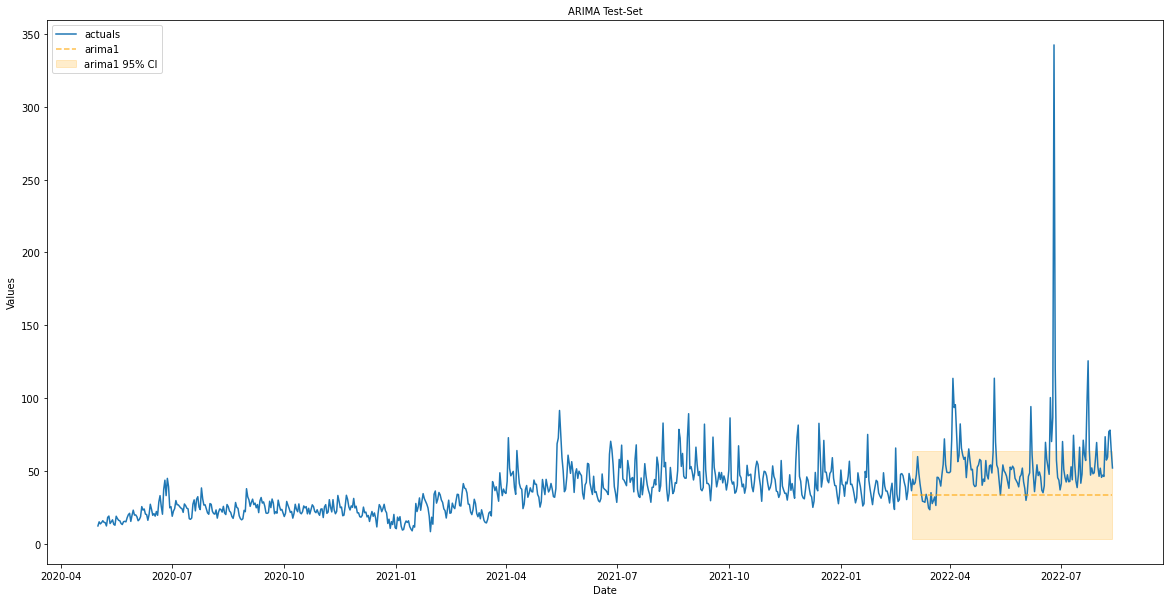

In [ ]:
#import data
df = pd.read_csv(r'C:\Users\negin\Desktop\saleseries.csv')
#Define forcaster
f = Forecaster(y=df['sales'],current_dates=df['date'])
f.generate_future_dates(120) # 100 days forecast
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima
f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set',size=10)
# plt.figure(figsize=(20, 10))
plt.gcf().set_size_inches(20, 10)
plt.show()


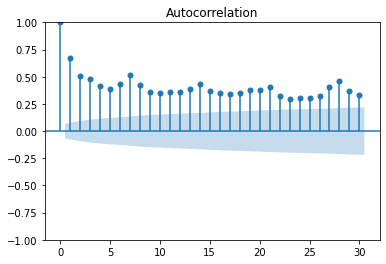

In [ ]:
f.plot_acf()
plt.show()

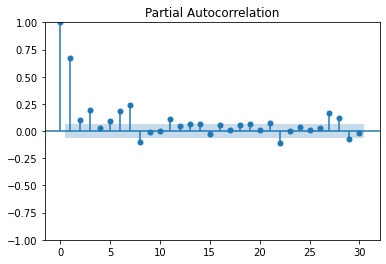

In [ ]:
f.plot_pacf()
plt.show()

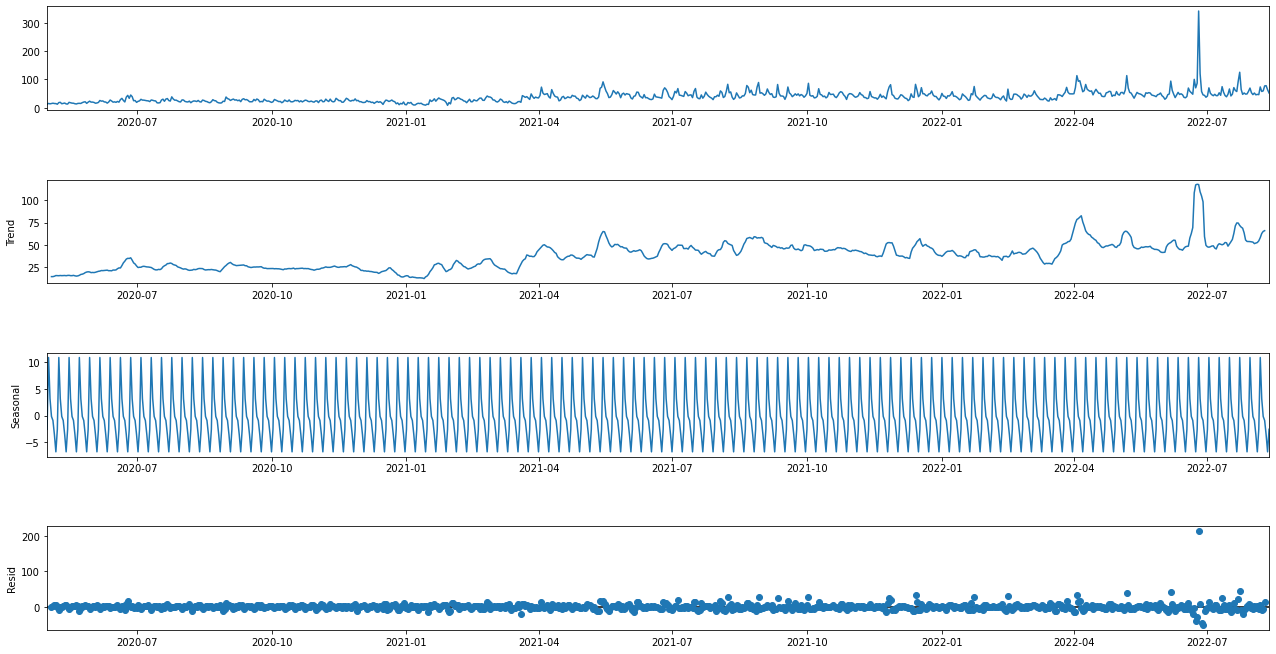

In [ ]:
#seasonal decomposition plots(it contains 3 plots,trend,seasonal and residuals)
f.seasonal_decompose().plot()
plt.gcf().set_size_inches(20, 10)
plt.show()

In [ ]:
#Fuller test for stationary
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

-2.5810163438739924
0.09698462036514632


In [ ]:
#set a manual arima seasonal model by considering 7 days seasonality
f.manual_forecast(order=(1,1,1),seasonal_order=(2,1,1,7),call_me='arima2')

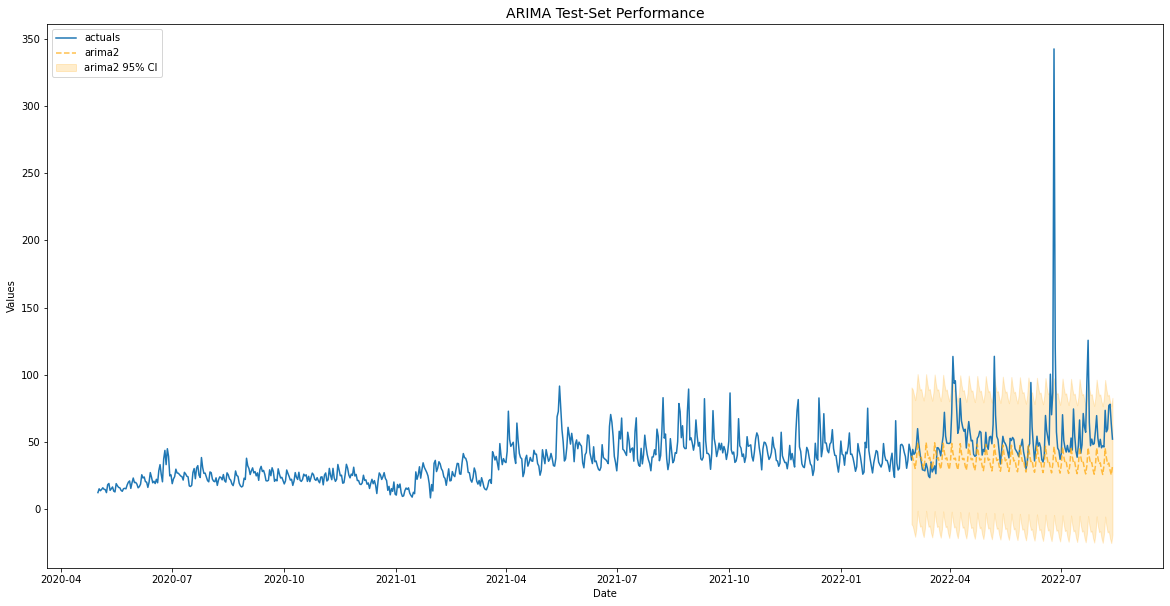

In [ ]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.gcf().set_size_inches(20, 10)
plt.show()


In [ ]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                               y   No. Observations:                  834
Model:             ARIMA(1, 1, 1)x(2, 1, 1, 7)   Log Likelihood               -3281.742
Date:                         Sun, 21 Aug 2022   AIC                           6575.483
Time:                                 15:51:30   BIC                           6603.783
Sample:                                      0   HQIC                          6586.338
                                         - 834                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4739      0.017     27.101      0.000       0.440       0.508
ma.L1         -0.9710      0.013    -71.983      0.000      -0.997      -0.945
ar.S.L7        0.0801      0.028      2.900      0.004       0.026       0.134
ar.S.L14      -0.0787      0.066     -1.200      0.230      -0.207       0.050
ma.S.L7       -0.9439      0.019    -50.862      0.000      -0.980      -0.907
sigma2       161.3570      1.020    158.160      0.000     159.357     163.357
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):           1551408.93
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):              21.92   Skew:                            10.61
Prob(H) (two-sided):                  0.00   Kurtosis:                       214.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#install pmdarima to find the best sarima model automatically!
pip install pmdarima

SyntaxError: invalid syntax (Temp/ipykernel_81156/2320208455.py, line 2)

In [ ]:
#set a seasonal arima(sarima model; the less AIC the better model)
auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=7,
    seasonal=True,
    trace=True,
    error_action='ignore',
#     suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=4536.112, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4885.662, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4747.349, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4762.805, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4883.679, Time=0.01 sec
 ARIMA(2,1,1)(0,0,1)[7] intercept   : AIC=4647.412, Time=0.32 sec
 ARIMA(2,1,1)(1,0,0)[7] intercept   : AIC=4621.675, Time=0.39 sec
 ARIMA(2,1,1)(2,0,1)[7] intercept   : AIC=4534.223, Time=2.52 sec
 ARIMA(2,1,1)(2,0,0)[7] intercept   : AIC=4604.877, Time=0.87 sec
 ARIMA(2,1,1)(2,0,2)[7] intercept   : AIC=4540.337, Time=2.42 sec
 ARIMA(2,1,1)(1,0,2)[7] intercept   : AIC=4531.679, Time=2.08 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=4634.693, Time=0.73 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=4529.282, Time=1.81 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=4634.263, Time=0.68 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept

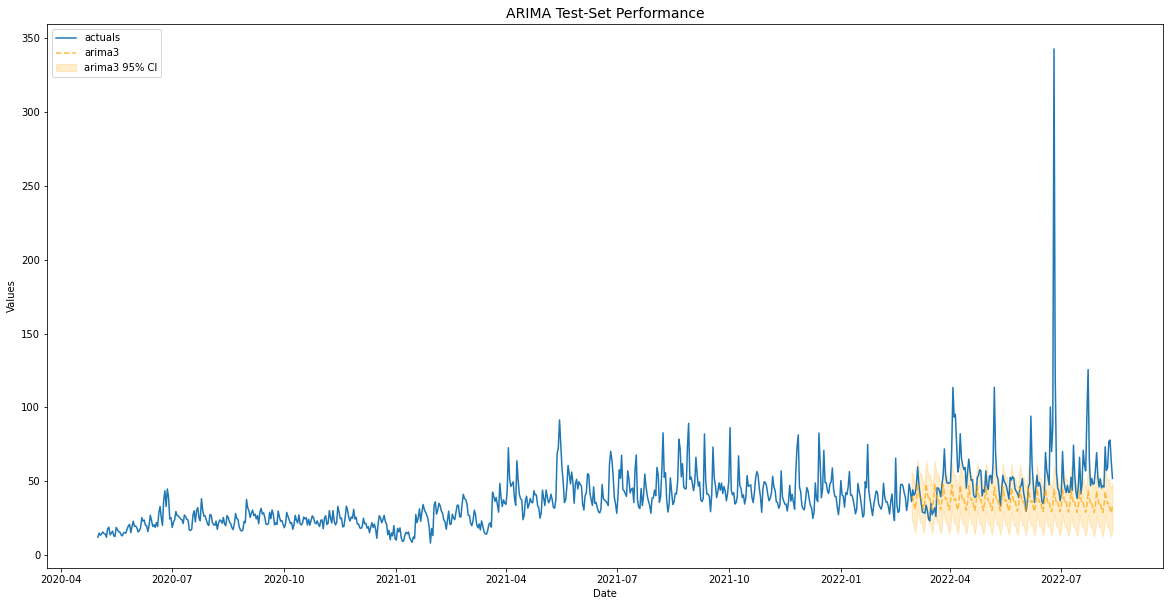

In [ ]:
f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.gcf().set_size_inches(20, 10)
plt.show()

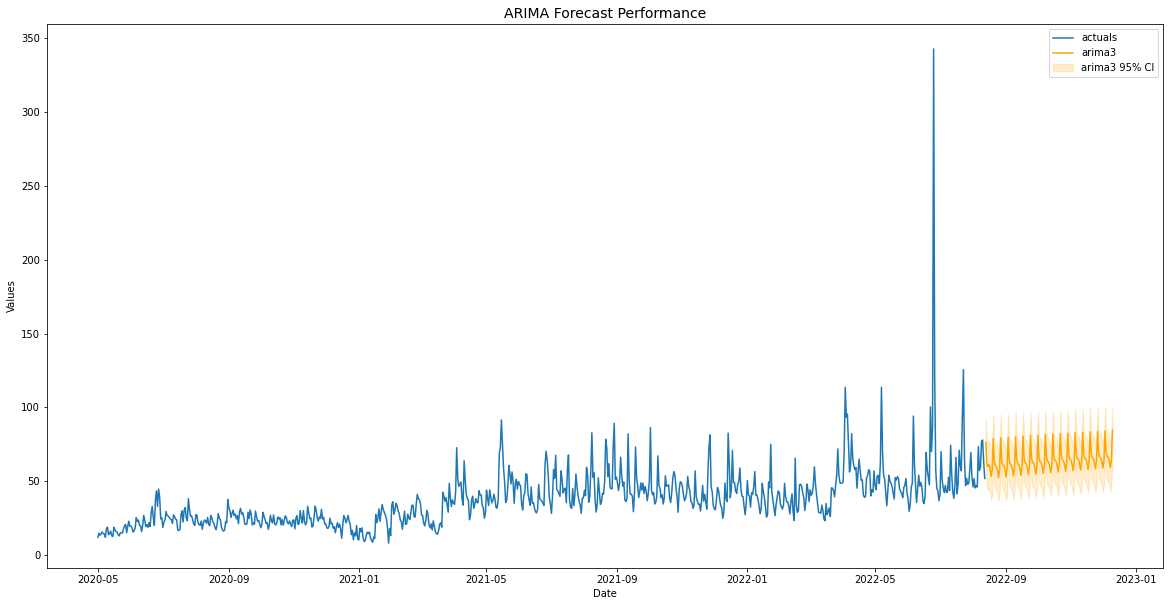

In [ ]:
f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [ ]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  834
Model:             ARIMA(1, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -3304.543
Date:                              Sun, 21 Aug 2022   AIC                           6621.087
Time:                                      15:55:54   BIC                           6649.437
Sample:                                           0   HQIC                          6631.957
                                              - 834                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4802      0.016     29.384      0.000       0.448       0.512
ma.L1         -0.9766      0.012    -81.218      0.000      -1.000      -0.953
ar.S.L7        0.9956      0.010     97.114      0.000       0.975       1.016
ma.S.L7       -0.8526      0.029    -29.550      0.000      -0.909      -0.796
ma.S.L14      -0.0983      0.026     -3.816      0.000      -0.149      -0.048
sigma2       161.5414      2.459     65.687      0.000     156.721     166.362
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):           1585045.63
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):              22.85   Skew:                            10.64
Prob(H) (two-sided):                  0.00   Kurtosis:                       215.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
f.set_validation_length(12)
grid = {
    'order':[
        (1,1,1),
        (1,1,0),
        (0,1,1),
    ],
    'seasonal_order':[
        (1,0,2,7),
        (1,1,1,7),
        (2,1,0,7),
        (0,1,0,7),
    ],
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

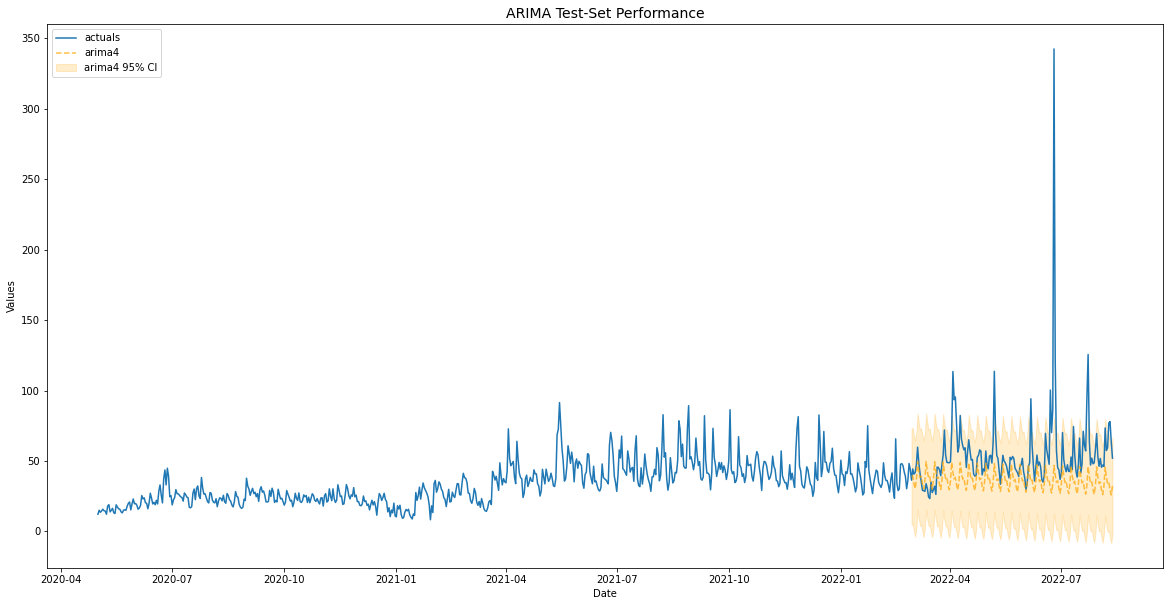

In [ ]:
f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.gcf().set_size_inches(20, 10)
plt.show()

In [ ]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                               y   No. Observations:                  834
Model:             ARIMA(0, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -3328.255
Date:                         Sun, 21 Aug 2022   AIC                           6664.509
Time:                                 15:56:15   BIC                           6683.376
Sample:                                      0   HQIC                          6671.746
                                         - 834                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5589      0.008    -71.107      0.000      -0.574      -0.543
ar.S.L7        0.0351      0.042      0.840      0.401      -0.047       0.117
ma.S.L7       -0.9515      0.015    -61.696      0.000      -0.982      -0.921
sigma2       181.4440      1.394    130.157      0.000     178.712     184.176
===================================================================================
Ljung-Box (L1) (Q):                  11.19   Jarque-Bera (JB):            753450.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              25.16   Skew:                             7.22
Prob(H) (two-sided):                  0.00   Kurtosis:                       150.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pd.options.display.max_colwidth = 100
# pishi_result=f.to_excel(r'C:\Users\negin\Desktop\Karafs_sale_forcast.xlsx', index = False)
results = f.export(to_excel=True,excel_name='arima_results.xlsx',determine_best_by='TestSetMAPE')
summaries = results['model_summaries']
summaries[['ModelNickname','HyperParams','InSampleMAPE','TestSetMAPE']]


,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima3,"{'order': (1, 1, 1), 'seasonal_order': (1, 0, 2, 7), 'trend': None}",0.146703,0.298375
1,arima4,"{'order': (0, 1, 1), 'seasonal_order': (1, 1, 1, 7)}",0.153482,0.306589
2,arima2,"{'order': (1, 1, 1), 'seasonal_order': (2, 1, 1, 7)}",0.150377,0.312081
3,arima1,{},0.440848,0.331769


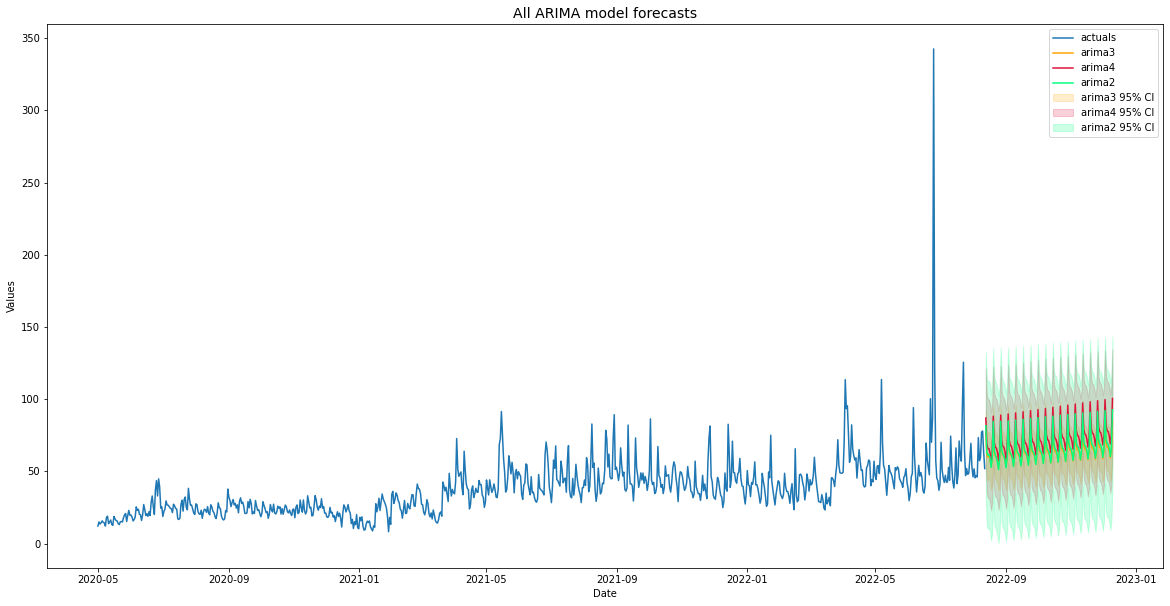

In [ ]:
f.plot(ci=True,models=['arima2','arima3','arima4'],order_by='TestSetMAPE')
plt.title('All ARIMA model forecasts',size=14)
plt.gcf().set_size_inches(20, 10)
plt.show()
